# Data Analytics YTIP2200, part7 - exercises

Return .ipynb file to Optima Return box **Sun 18th Apr** at latest. Write in comment field which excercised you've done fully/partly. You can also comment which parts are done/missing.

You can write your solutions in new code cells between existing cells.

Don't use for loops etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 1. Wines


File http://gpspekka.kapsi.fi/dataanalytics/part7/wine.csv has data on Portuguese wines. 

Use both **logistic regression** and **decision tree** to predict *type (white/red)* with other fields.

Split train/test set 70/30 % and test both models with same test data. Print scores and confusion matrices.

Rows with missing values can be dropped here (only few).

In [238]:
df_wine = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part7/wine.csv')

# map numerical values for wine: white 1, red 2
df_wine['type'] = df_wine['type'].map({'white': 1, 'red': 2})

# drop missing values
df_wine.dropna(inplace = True)

# setting explanatory variables (df with all columns except type)
X = df_wine.loc[:, df_wine.columns != 'type']

# binary dependent variable wine type (white or red)
y = df_wine['type']

# splitting data to train (70%) and test (30%) data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 15) 

# standardize X-variables --

# fit train set
scaler = StandardScaler().fit(xTrain)

# transform train set
xTrain_scaled = scaler.transform(xTrain)

# transform test set
xTest_scaled = scaler.transform(xTest)

# --------------------------

# model the binary dependent variable with a logistic function.
model = LogisticRegression()
model.fit(xTrain_scaled, yTrain)

#predictions to all X's
y_pred = model.predict(xTest_scaled)


# print scores (share of right guesses)
print(f'Score: {model.score(xTest_scaled, yTest)} \n')

# compare predictions with real values
print('Confusion matrix:')
print(confusion_matrix(yTest, y_pred))



#df_wine
#df_wine.info()
#df_wine.isnull().sum()

# sama tehty yllä eri tavalla - eka tapa talteen: list columns (except first one - type), filter df
# w_columns = list(df_wine.columns[1:])
# X = df_wine[w_columns]

Score: 0.9932955131511089 

Confusion matrix:
[[1453    3]
 [  10  473]]


In [239]:
# DECISION TREE

model_tree = DecisionTreeClassifier()
model_tree.fit(xTrain_scaled, yTrain)
y_pred_tree = model_tree.predict(xTest_scaled)

print(f'Score: {model_tree.score(xTest_scaled, yTest)} \n')

print('Confusion matrix:')
print(confusion_matrix(yTest, y_pred_tree))


Score: 0.9834966477565755 

Confusion matrix:
[[1440   16]
 [  16  467]]


# 2. Voices
File http://gpspekka.kapsi.fi/dataanalytics/part7/voice.csv has data on human voices ([column info](http://gpspekka.kapsi.fi/dataanalytics/part7/voice.txt)).
 
Predict *label* with other fields using **decision tree**.

Split train/test set 70/30 %.

Print score, confusion matrix and relative importances of explanatory variables.

Then pick two most imporant variables and plot (scatter) them with male and female voices in different color.   
And another plot with those variables using different color on *predicted* male/female voices.

In [240]:
df_voice = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part7/voice.csv')

# df_voice.isnull().sum() #no nulls

# map numerical values for label: female 0, male 1
df_voice['label'] = df_voice['label'].map({'female': 0, 'male': 1})


# setting explanatory variables (df with all columns except type)
X_voice = df_voice.loc[:, df_voice.columns != 'label'] #voisi olla myös df_voice.drop('label', axis = 1)


# binary dependent variable wine type (white or red)
y = df_voice['label']

# used in splitting and in DecisionTreeClassifier to get every time same random split
seed = 15

# splitting data to train (70%) and test (30%) data
x_train, x_test, y_train, y_test = train_test_split(X_voice, y, test_size = 0.3, random_state = seed) 


# model the binary dependent variable using decision tree
model_voice = DecisionTreeClassifier(random_state = seed) # Create model object
model_voice.fit(x_train, y_train)                         # fit model


# print scores (share of right guesses)
# print(f'Train score: {model_voice.score(x_train, y_train)}' )
print(f'Test score: {model_voice.score(x_test, y_test)} \n')

#predictions to all x_test: X -> y ?
y_pred_voice = model_voice.predict(x_test)


# compare real values with predictions
print('Confusion matrix:')
how_it_went = confusion_matrix(y_test, y_pred_voice)

# print consion matrix
print(how_it_went)

print('\nConfusion matrix explained:')
# female 0 NEGATIVE, male 1 POSITIVE, ie. is it a man or not a man
print(f'was predicted to be male and was male {how_it_went[0][0]}') # True positive (the model correctly predicts the positive class)
print(f'was predicted to be male, but was female {how_it_went[0][1]}') # False positive (the model incorrectly predicts the positive class when it is actually negative)
print(f'was predicted to be female, but was male {how_it_went[1][0]}') # False negative (the model incorrectly predicts the negative class when it is actually positive)
print(f'was predicted to be female and was female {how_it_went[1][1]}\n') # True negative (the model correctly predicts the negative class)
# https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d

#print(f'\nImportances: {model_voice.feature_importances_}')

importances = model_voice.feature_importances_

# print relative importances of explanatory variables
for i in range(len(importances)):
     print('feature: %12s - relative importance: %4.1f %%' % (X_voice.columns[i], importances[i] * 100))

Test score: 0.9705573080967402 

Confusion matrix:
[[455  15]
 [ 13 468]]

Confusion matrix explained:
was predicted to be male and was male 455
was predicted to be male, but was female 15
was predicted to be female, but was male 13
was predicted to be female and was female 468

feature:     meanfreq - relative importance:  0.3 %
feature:           sd - relative importance:  1.3 %
feature:       median - relative importance:  0.1 %
feature:          Q25 - relative importance:  0.5 %
feature:          Q75 - relative importance:  1.0 %
feature:          IQR - relative importance:  5.0 %
feature:         skew - relative importance:  1.1 %
feature:         kurt - relative importance:  0.4 %
feature:       sp.ent - relative importance:  0.1 %
feature:          sfm - relative importance:  1.3 %
feature:         mode - relative importance:  0.8 %
feature:     centroid - relative importance:  0.3 %
feature:      meanfun - relative importance: 84.1 %
feature:       minfun - relative importance:

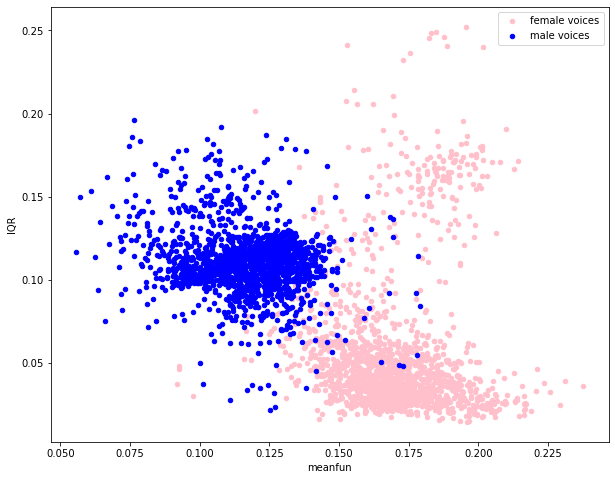

In [241]:
# Pick two most imporant variables and plot (scatter) them with male and female voices in different colors.

female_voices = df_voice[df_voice['label'] == 0]
male_voices = df_voice[df_voice['label'] == 1]

ax1 = female_voices.plot.scatter('meanfun', 'IQR', label = 'female voices', color = 'pink', figsize = (10, 8))
male_voices.plot.scatter('meanfun', 'IQR', label = 'male voices', color = 'blue', ax = ax1)
plt.show()


# itselle talteen
# näin plottaisit erilliset plotit
# plot_female_voices = female_voices.plot.scatter('meanfun', 'IQR', label = 'female voices', color = 'purple', figsize = (10, 8))
# plot_male_voices = male_voices.plot.scatter('meanfun', 'IQR', label = 'male voices', color = 'green', figsize = (10, 8))


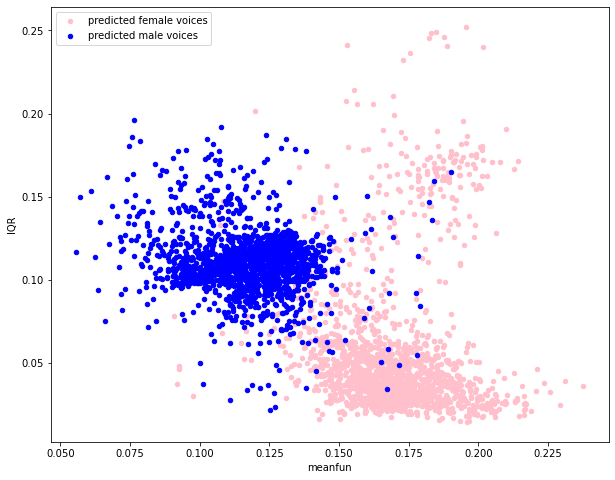

In [242]:
# Plot with two most imporant variables using different color on predicted male/female voices.


#predictions to all X's
y_pred_all = model_voice.predict(X_voice)

# choose all rows that were predicted as female
female_voices_pred = df_voice[y_pred_all == 0]

# choose all rows that were predicted as male
male_voices_pred = df_voice[y_pred_all == 1]

ax1 = female_voices_pred.plot.scatter('meanfun', 'IQR', label = 'predicted female voices', color = 'pink', figsize = (10, 8))
male_voices_pred.plot.scatter('meanfun', 'IQR', label = 'predicted male voices', color = 'blue', ax = ax1)

# 3. NBA
File http://gpspekka.kapsi.fi/dataanalytics/part7/nba.csv has data on NBA basketball players on their first season.([column info](http://gpspekka.kapsi.fi/dataanalytics/part7/nba.png)).

Last column TARGET_5Yrs tells if player's career has exceed 5 years or not.

Try to predict that with other fields using both **logistic regression** and **decision tree**. Print scores and confusion matrices. Split train/test data 60/40%.

Fill missing values with field median.

In [245]:
df_nba = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part7/nba.csv')


X_nba = df_nba.drop(['TARGET_5Yrs', 'Name'], axis = 1)
y = df_nba['TARGET_5Yrs']

seed = 15

x_train, x_test, y_train, y_test = train_test_split(X_nba, y, test_size = 0.4, random_state = seed)


# Fill missing values with field median
# df_nba.isna().sum()                     # only nan's in 3P%

median_3p_train = x_train['3P%'].median()
x_train['3P%'] = x_train['3P%'].fillna(median_3p_train)

median_3p_test = x_test['3P%'].median()
x_test['3P%'] = x_test['3P%'].fillna(median_3p_test)

# fit train set
scaler = StandardScaler().fit(x_train)

# transform train set
x_train_scaled = scaler.transform(x_train)

# transform test set
x_test_scaled = scaler.transform(x_test)


# LOGISTIC REGRESSION -----

print('Logistic regression\n')

model_nba_log = LogisticRegression()
model_nba_log.fit(x_train_scaled, y_train)

# print scores (share of right guesses)
print(f'Train score: {model_nba_log.score(x_train_scaled, y_train)}' )
print(f'Test score: {model_nba_log.score(x_test_scaled, y_test)} \n')

#predictions to all x_test: X -> y ?
y_pred_years_log = model_nba_log.predict(x_test_scaled)

# compare real values with predictions
print('Confusion matrix:')
how_it_went_log = confusion_matrix(y_test, y_pred_years_log)

# print consion matrix
print(how_it_went_log)


# DECISION TREE -----------

print('\nDecision tree \n')

# model the binary dependent variable using decision tree
model_nba_tree = DecisionTreeClassifier(random_state = seed)        # Create model object
model_nba_tree.fit(x_train_scaled, y_train)                         # fit model


# print scores (share of right guesses)
print(f'Train score: {model_nba_tree.score(x_train_scaled, y_train)}' )
print(f'Test score: {model_nba_tree.score(x_test_scaled, y_test)} \n')

#predictions to all x_test: X -> y ?
y_pred_years = model_nba_tree.predict(x_test_scaled)

# compare real values with predictions
print('Confusion matrix:')
how_it_went = confusion_matrix(y_test, y_pred_years)

# print confusion matrix
print(how_it_went)

# -------------------------


Logistic regression

Train score: 0.7176616915422885
Test score: 0.6977611940298507 

Confusion matrix:
[[109 106]
 [ 56 265]]

Decision tree 

Train score: 0.9875621890547264
Test score: 0.6026119402985075 

Confusion matrix:
[[ 88 127]
 [ 86 235]]


<ipython-input-245-b52d97f9946e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['3P%'] = x_train['3P%'].fillna(median_3p_train)
<ipython-input-245-b52d97f9946e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['3P%'] = x_test['3P%'].fillna(median_3p_test)


# 4.  Mushrooms
File has data on mushrooms http://gpspekka.kapsi.fi/dataanalytics/part7/mushrooms.csv ([column info](http://gpspekka.kapsi.fi/dataanalytics/part7/mushrooms.txt)).

Try to predict **class** (edible or poisonous) with other fields on **decision tree**

Fields are categorial, like:
```
    gill-attachment: attached=a,descending=d,free=f,notched=n
```
so one-hot-encoding is needed.

Split train/test data 60/40%

Try decision tree max_depths 2,3,4 and 5 and print their scores and confusion matrices.

Visualize flowchart with max_depth=3 and attach it as image   
markdown syntax:  
```
![alt text](image url)
```

In [246]:
df_shroom = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part7/mushrooms.csv')

# Is the mushroom poisonous? Map 0/1.
df_shroom['class'] = df_shroom['class'].map({'e': 0, 'p': 1})

# Does the mushroom have bruises? Map 0/1
df_shroom['bruises'] = df_shroom['bruises'].map({'f': 0, 't': 1})

# Is the gill-size broad?
df_shroom['gill-size'] = df_shroom['gill-size'].map({'n': 0, 'b': 1})

# Is the stalk-shape enlarging?
df_shroom['stalk-shape'] = df_shroom['stalk-shape'].map({'t': 0, 'e': 1})

# Is the veil-type partial?
df_shroom['veil-type'] = df_shroom['veil-type'].map({'u': 0, 'p': 1})

# How many ring-numbers?
df_shroom['ring-number'] = df_shroom['ring-number'].map({'n': 0, 'o': 1, 't': 2})

# Categorial columns to one-hot encode (all others than the ones above)
categorial_cols =   ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-spacing',
                     'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                     'stalk-color-above-ring','stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 
                     'population', 'habitat']

dummies = pd.get_dummies(df_shroom, columns = categorial_cols)

X_shroom = dummies.drop(['class'], axis = 1)
y = df_shroom['class']

X_shroom


,bruises,gill-size,stalk-shape,veil-type,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,1,1,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [247]:
# Try decision tree max_depths 2,3,4 and 5 and print their scores and confusion matrices.


# used to get every time same random split
seed = 15

# split
x_train, x_test, y_train, y_test = train_test_split(X_shroom, y, test_size = 0.4, random_state = seed)


for depth in range(2, 6):
    # model the binary dependent variable using decision tree
    model_shroom_dep = DecisionTreeClassifier(random_state = seed, max_depth = depth) # Create model object
    model_shroom_dep.fit(x_train, y_train)                                            # fit model
    
    # print scores (share of right guesses)
    print(f'Train score, decision tree depth {depth}: {model_shroom_dep.score(x_train, y_train)}' )
    print(f'Test score, decision tree depth {depth}: {model_shroom_dep.score(x_test, y_test)} \n')
    
    #predictions to all x_test: X -> y ?
    y_pred_years = model_shroom_dep.predict(x_test)
    
    # compare real values with predictions
    print(f'Confusion matrix, decision tree depth {depth}:')
    print(confusion_matrix(y_test, y_pred_years))
    print('\n---\n')


Train score, decision tree depth 2: 0.9591711120229791
Test score, decision tree depth 2: 0.9467692307692308 

Confusion matrix, decision tree depth 2:
[[1571  132]
 [  41 1506]]

---

Train score, decision tree depth 3: 0.9862535904800985
Test score, decision tree depth 3: 0.9836923076923076 

Confusion matrix, decision tree depth 3:
[[1655   48]
 [   5 1542]]

---

Train score, decision tree depth 4: 0.9950759130077965
Test score, decision tree depth 4: 0.9907692307692307 

Confusion matrix, decision tree depth 4:
[[1677   26]
 [   4 1543]]

---

Train score, decision tree depth 5: 0.9979482970865818
Test score, decision tree depth 5: 0.9944615384615385 

Confusion matrix, decision tree depth 5:
[[1687   16]
 [   2 1545]]

---



In [18]:
# Visualize flowchart with max_depth=3 and attach it as image markdown syntax: ![alt text](image url)

# model the binary dependent variable using decision tree
model_shroom_dep = DecisionTreeClassifier(random_state = seed, max_depth = 3) # Create model object
model_shroom_dep.fit(x_train, y_train)                                        # fit model

# Export flowchart of the model 
export_graphviz(decision_tree = model_shroom_dep, out_file="mushrooms.dot",
                feature_names = X_shroom.columns, class_names = True, filled = True, rounded = True)


# Resulted .dot-file (check files) can be visualised in for example https://dreampuf.github.io/GraphvizOnline/
# inserted below a cell, changed its type to markdown and used given markdown syntax

![Decision tree](mushroom.png)

# 5. Loan status
File http://gpspekka.kapsi.fi/dataanalytics/part7/loan.txt data on loanees. Last column Loan_Status Y/N, should be predicted with other fields using **logistic regression**.  


Do modifications:
* Categorial fields to numeric (2-value fields to 0/1, multivalue as dummies)
* replace missing values with median
* remove rows with **outliers**: ApplicantIncome, CoapplicantIncome or LoanAmount over 3 standard deviations away from field average
* split train/test set with 70/30%

Fit logistic regression with train set and test with test set and print score and confusion matrix.

Check what would be model's probability to Loan_status = Yes with values:

```
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          2400
CoapplicantIncome        2000
LoanAmount                 36
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
```

In [248]:
df_loan = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part7/loan.txt')

# 2-value fields to 0/1
df_loan['Gender'] = df_loan['Gender'].map({'Female': 0, 'Male': 1})
df_loan['Married'] = df_loan['Married'].map({'No': 0, 'Yes': 1})
df_loan['Education'] = df_loan['Education'].map({'Not Graduate': 0, 'Graduate': 1})
df_loan['Self_Employed'] = df_loan['Self_Employed'].map({'No': 0, 'Yes': 1})
df_loan['Loan_Status'] = df_loan['Loan_Status'].map({'N': 0, 'Y': 1})

# multivalue as dummies
df_clean = pd.get_dummies(df_loan, columns = ['Property_Area'])



# remove rows with outliers: ApplicantIncome, CoapplicantIncome or LoanAmount over 3 standard deviations away from field average
# found recommendations to do this before split
min_limit_a = df_clean['ApplicantIncome'].mean() - 3 * df_clean['ApplicantIncome'].std()
max_limit_a = df_clean['ApplicantIncome'].mean() + 3 * df_clean['ApplicantIncome'].std()
df_clean.drop(df_clean[(df_clean['ApplicantIncome'] < min_limit_a) | (df_clean['ApplicantIncome'] > max_limit_a)].index, inplace = True)


min_limit_c = df_clean['CoapplicantIncome'].mean() - 3 * df_clean['CoapplicantIncome'].std()
max_limit_c = df_clean['CoapplicantIncome'].mean() + 3 * df_clean['CoapplicantIncome'].std()
df_clean.drop(df_clean[(df_clean['CoapplicantIncome'] < min_limit_c) | (df_clean['CoapplicantIncome'] > max_limit_c)].index, inplace = True)

min_limit_l = df_clean['LoanAmount'].mean() - 3 * df_clean['LoanAmount'].std()
max_limit_l = df_clean['LoanAmount'].mean() + 3 * df_clean['LoanAmount'].std()
df_clean.drop(df_clean[(df_clean['LoanAmount'] < min_limit_l) | (df_clean['LoanAmount'] > max_limit_l)].index, inplace = True)



# binary dependent
y = df_clean['Loan_Status']

# setting explanatory variables
X_loan = df_clean.drop(['Loan_ID', 'Loan_Status'], axis = 1)

# get column names with nans as a list to later fill know what to fill in
columns_with_nans = X_loan.columns[X_loan.isna().any()].tolist()

# Skaalaus kuuluukin tehdä vasta splittauksen jälkeen https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
# scaler = StandardScaler()
# X_loan = pd.DataFrame(scaler.fit_transform(X_loan), columns = X_loan.columns)

# Split to training and test sets
seed = 15
x_train, x_test, y_train, y_test = train_test_split(X_loan, y, test_size = 0.3, random_state = seed)


# Fill missing values with field median for both training and test sets
x_train.fillna(x_train.loc[:, columns_with_nans].median(), inplace = True) # seuraava on vastaava, mutta herjaisi kopioinnista:  x_train.fillna(x_train[columns_with_nans].median(), inplace = True) 
x_test.fillna(x_test.loc[:, columns_with_nans].median(), inplace = True)

# fit train set
scaler = StandardScaler().fit(x_train)

# transform train set
x_train_scaled = scaler.transform(x_train)

# transform test set
x_test_scaled = scaler.transform(x_test)

# Fit logistic regression with train set and test with test set and print score and confusion matrix.

# Fit logistic regression
model_loan = LogisticRegression()
model_loan.fit(x_train_scaled, y_train)

# print scores (share of right guesses)
#print(f'Train score: {model_loan.score(x_train_scaled, y_train)}' )
print(f'Test score: {model_loan.score(x_test_scaled, y_test)} \n')

#predictions to all x_test: X -> y ?
y_pred_loan_status = model_loan.predict(x_test_scaled)

# compare real values with predictions
print('Confusion matrix:')
print(f'{confusion_matrix(y_test, y_pred_loan_status)}\n')

# Check what would be model's probability to "Loan_status = Yes" with values:
check = { 'Gender': 1,
         'Married': 0,
         'Dependents': 0,
         'Education': 1,
         'Self_Employed': 0,
         'ApplicantIncome': 2400,
         'CoapplicantIncome': 2000,
         'LoanAmount': 36,
         'Loan_Amount_Term': 360,
         'Credit_History': 1,
         'Property_Area_Urban': 1 }

# Create df, append check dict and fill nans with 0, convert type int
x_check = pd.DataFrame(columns = X_loan.columns)
x_check = x_check.append(check, ignore_index=True).fillna(0).astype(int)

# Transform values based on earlier fitting
x_check_scaled = scaler.transform(x_check)

# Predict probability
y_check = model_loan.predict(x_check_scaled)

if y_check[0] == 1:
    print('Loan_status = Yes -> Loan will be granted')
else:
    print('Loan_status = No -> Loan is not granted')

Test score: 0.8551236749116607 

Confusion matrix:
[[ 35  38]
 [  3 207]]

Loan_status = Yes -> Loan will be granted


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
# Itselle talteen value_counts treenailua https://re-thought.com/pandas-value_counts/
# df_loan['ApplicantIncome'].value_counts().sort_index(ascending = True)
# df_loan['ApplicantIncome'].value_counts(bins = 4)
# df_loan.apply(pd.Series.value_counts) # niin paljon, ettei hyötyä

